In [6]:
def is_grayscale(image):
    image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    stat = ImageStat.Stat(image_pil)
    return sum(stat.sum)/3 == stat.sum[0]

In [9]:
# prompt: Download and unpack the stanford dogs dataset into a folder

!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
!tar -xf images.tar


--2024-03-25 17:27:34--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82M  15.1MB/s    in 75s     

2024-03-25 17:28:49 (10.2 MB/s) - ‘images.tar’ saved [793579520/793579520]



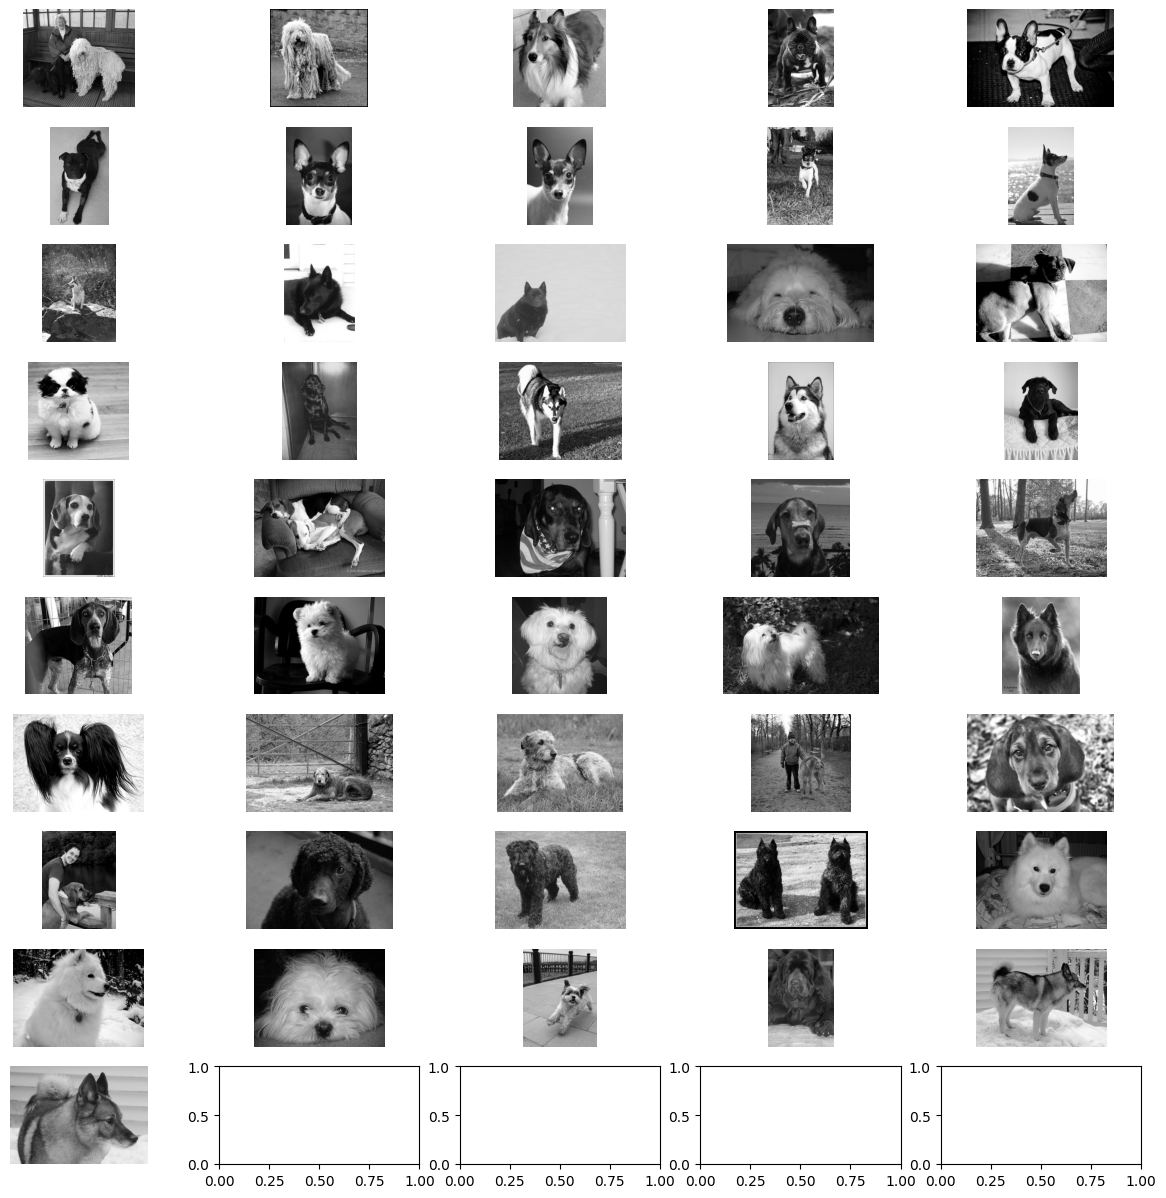

In [13]:
# prompt: Given my is_grayscale above load up the Stanford dogs dataset from the folder expanded out of the tarball, run through the set gathering images detected as grayscale, and plot them out in a 5 column by x rows display

import glob
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from PIL import ImageStat

def is_grayscale(image):
    image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    stat = ImageStat.Stat(image_pil)
    return sum(stat.sum)/3 == stat.sum[0]


images = glob.glob('Images/*/*.jpg')

grayscale_images = [image for image in images if is_grayscale(cv2.imread(image))]

num_rows = len(grayscale_images) // 5 + 1

fig, axes = plt.subplots(num_rows, 5, figsize=(15, 15))

for i, image_path in enumerate(grayscale_images):
    ax = axes[i // 5, i % 5]
    img = cv2.imread(image_path)
    ax.imshow(img)
    ax.axis('off')

plt.show()
